## EDA
    Overview:
        - Getting domain knowledge (searching for the topic)
        - Checking if the data is intuitive (agreed with domain knowledge, e.g. age range <100)
        - Understanding how the data was generated ('is incorrect' feature). Crutial for validation scheme.
        Train and test can be generated from different algorithms. 
            Symptoms: 
                - Improving the model on the validation set didnt result into improving public leaderboard score
                - public leaderboard score unexpectably higher than the validation score  

## Anonymized data
    
    Explore individual features:
        - Guess the meaning of the columns
        - Guess the type of the column
        
    If data was scaled, try to find parameteres and get original values
        
    Explore Feature relations:
        - Find relations between pairs
        - Find feature groups

## Visualisations

    Explore individual features:
        - Histograms
        - Plots
        - Statistics
    Explore Feature relations:
        - Scatter plots
        - Correlation plots
        - Plot (Index vs Feature statistics)
        
    Make a hypothesis and do several plots
    Plot index versus value
    log(x) to hist
    
    Check train and test distribution with scatterplots, by showing the class
    plt.matshow - visualize matrices, like correlation, number of unique values, etc.
    feature grouping - new features based on the groups(statistics, e.g group by mean value)    

## Cleaning

    remove constant features and features, that are constant only in train set or handle it separately
        df_train.nunique(axis = 1) == 1
    drop duplicated features 
        traintest.T.drop_duplicates()
    also categorical:
        for f in categorical_features:
            traintest[f] = traintest[f].factorize()
        traintest.T.drop_duplicates()
    Duplicated rows:
        Explain and remove
        check if train and test have common rows
    Check if dataset is suffled - if it is not, high chance to find leakage
        plot target vs row index plus smooth using running average
    

In [180]:
# #label encoder for anonymized data
for c in train.columns[train.dtypes == 'object']:
    X[C] = X[C].factorize()[0]
    
df.types()
df.info()
x.value_counts()
x.isnull()

In [177]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
os.getcwd()
os.chdir('/Users/pavelfedorov/Desktop/competitive_data_science/Titanic/data')
list(os.scandir())

[<DirEntry 'test.csv'>,
 <DirEntry 'train.csv'>,
 <DirEntry 'gender_submission.csv'>]

In [179]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_sub = pd.read_csv('gender_submission.csv')

In [54]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
df_train.groupby('Fare').size().reset_index().sort_values(0, ascending = False).head()

,Fare,0
43,8.0500,43
85,13.0000,42
40,7.8958,38
30,7.7500,34
138,26.0000,31


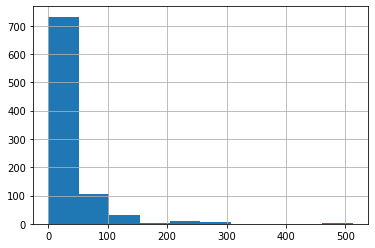

In [61]:
df_train.Fare.hist()

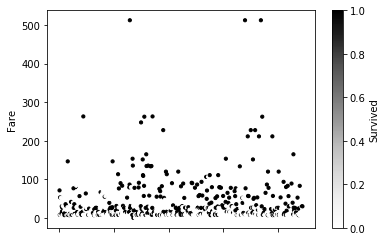

In [80]:
df_train.reset_index().plot.scatter(x='index', y='Fare', s = 10, c = 'Survived')

In [81]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
df_train.Age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

In [87]:
df_train.Age.isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

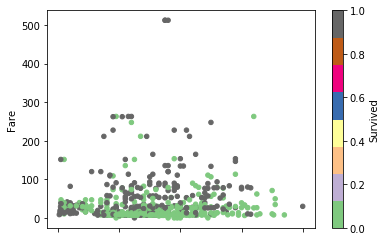

In [131]:
df_train.plot.scatter('Age','Fare', c = 'Survived', colormap='Accent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124e662b0>,
      dtype=object)

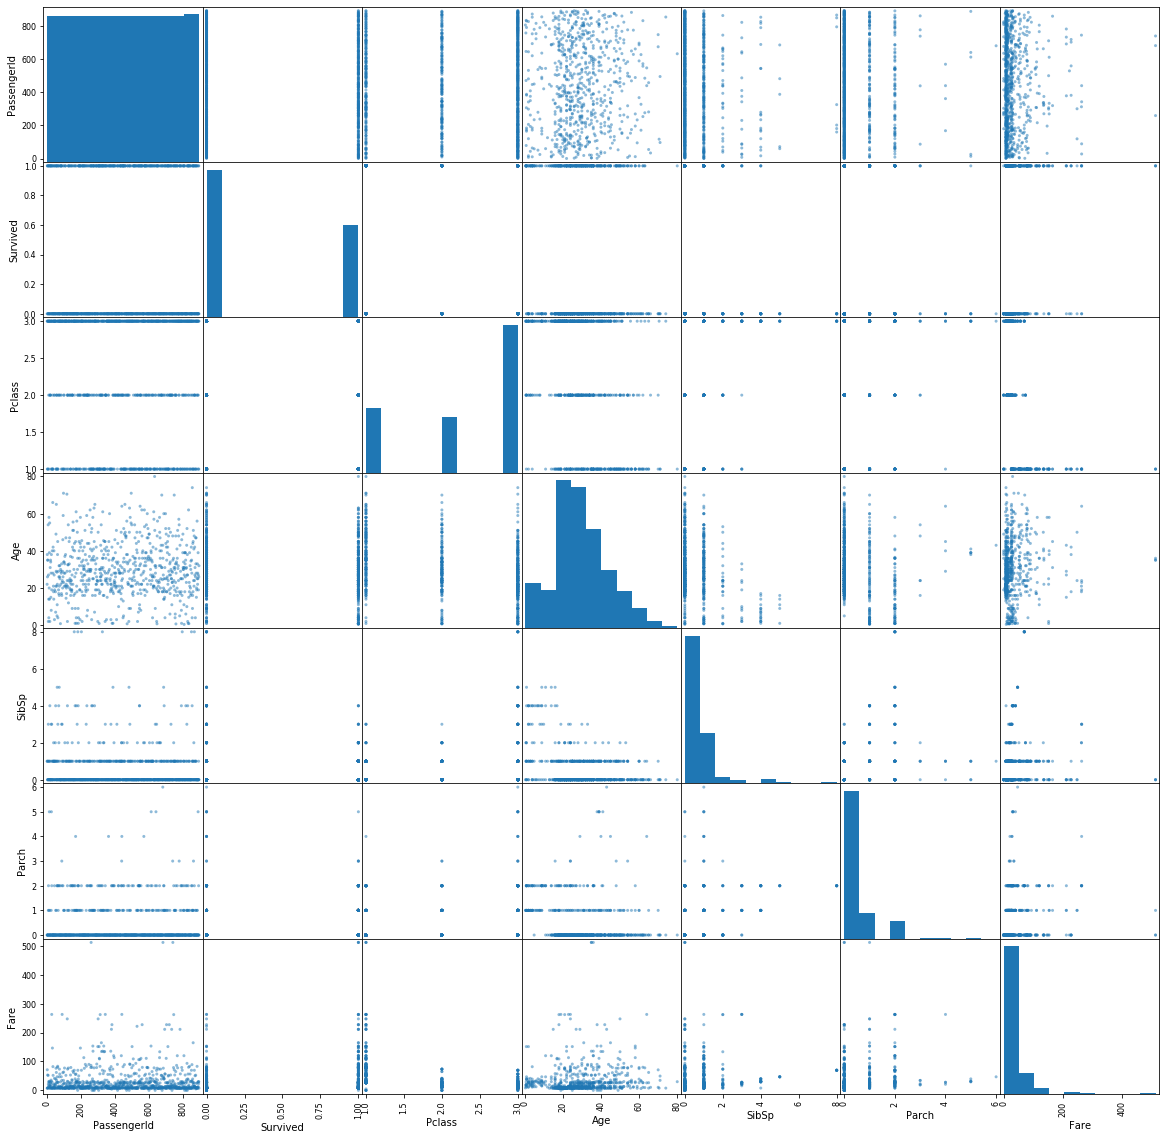

In [144]:
pd.plotting.scatter_matrix(df_train, figsize = [20, 20])

In [153]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


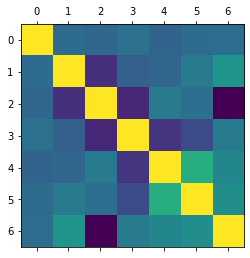

In [154]:
plt.matshow(df_train.corr())

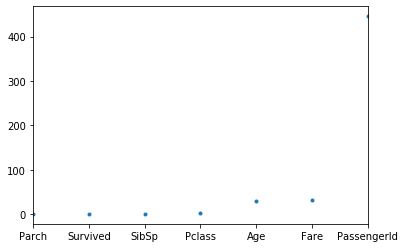

In [162]:
df_train.mean().sort_values().plot(style = '.')

In [173]:
df_train.nunique(axis = 1) == 1

891

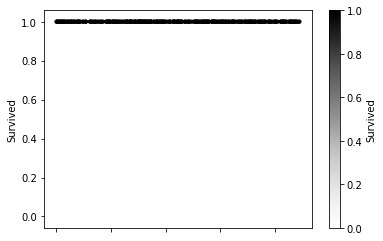

In [175]:
#smooth using running average
df_train.reset_index().plot.scatter(x='index', y='Survived', s = 10, c = 'Survived')